Iteration 0, SGD Loss: 2.364014793645665
Iteration 0, Momentum Loss: 2.3182371321726283
Iteration 0, AdaGrad Loss: 2.0646367742662832
Iteration 0, Adam Loss: 2.1874250266078765
Iteration 100, SGD Loss: 1.642436310347513
Iteration 100, Momentum Loss: 0.3258498366319123
Iteration 100, AdaGrad Loss: 0.11707596895089441
Iteration 100, Adam Loss: 0.19537680403083774
Iteration 200, SGD Loss: 0.8302037060742283
Iteration 200, Momentum Loss: 0.20045476087247568
Iteration 200, AdaGrad Loss: 0.11051610962220798
Iteration 200, Adam Loss: 0.18204367824596995
Iteration 300, SGD Loss: 0.8130226458045062
Iteration 300, Momentum Loss: 0.43018786444359897
Iteration 300, AdaGrad Loss: 0.19574838042108988
Iteration 300, Adam Loss: 0.27485754062883216
Iteration 400, SGD Loss: 0.3053457642456922
Iteration 400, Momentum Loss: 0.09234849014885566
Iteration 400, AdaGrad Loss: 0.041702822746011045
Iteration 400, Adam Loss: 0.0622029508771248
Iteration 500, SGD Loss: 0.3684793043602863
Iteration 500, Momentum L

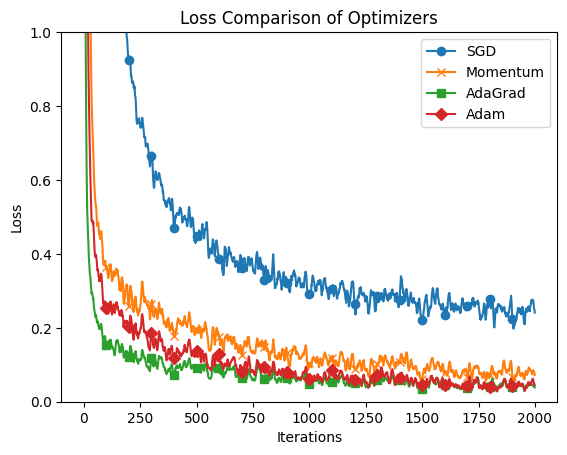

In [4]:
import os, sys

current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)

sys.path.append(parent_dir)

import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import *

(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000

optimizers = {}
optimizers["SGD"] = SGD()
optimizers["Momentum"] = Momentum()
optimizers["AdaGrad"] = AdaGrad()
optimizers["Adam"] = Adam()
# optimizers["RMSprop"] = RMSprop()

networks = {}
train_loss = {}

for key in optimizers.keys():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100], output_size=10)
    train_loss[key] = []

for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    for key in optimizers.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizers[key].update(networks[key].params, grads)

        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)

    if i % 100 == 0:
        for key in optimizers.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(f"Iteration {i}, {key} Loss: {loss}")



markers = {"SGD": "o", "Momentum": "x", "AdaGrad": "s", "Adam": "D"}
x = np.arange(max_iterations)
for key in train_loss.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.ylim(0, 1.0)
plt.legend()
plt.title("Loss Comparison of Optimizers")
plt.legend()
plt.show()